In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*  traindataset have 891 rows and 12 columns .
*  It consist of int, float and object datatype


### EXPLORATORY DATA ANALYSIS(EDA) ON TRAIN DATASET.

##### Checking for null values 

In [5]:
null_val = []
for i in train.columns:
    x = train[i].isnull().sum()
    null_val.append(x)
    
pd.DataFrame(null_val, index = train.columns, columns = ['Total missing values'])    
    
    

,Total missing values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
#we can remove the cabin column as it not affecting our prediction 

train.drop(['Cabin'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
null_val = []
for i in train.columns:
    x = train[i].isnull().sum()
    null_val.append(x)
    
pd.DataFrame(null_val, index = train.columns, columns = ['Total missing values'])    
    
    

,Total missing values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Pclass', ylabel='Age'>

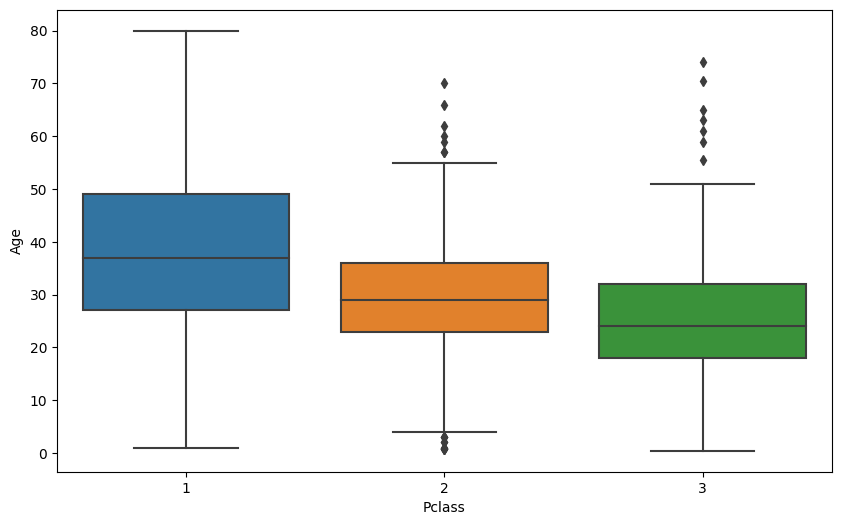

In [8]:
#fill the nan values in age column with the age of ticket holders according to Pclass
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
sns.boxplot(x = "Pclass", y = "Age", data = train)

* From the graph we can deduct that the quality of ticket class increases as age increases. In other words, those that are older tends to buy first class tickets.

* Passengers with Pclass 1 have an average age of 38.

* Passengers with Pclass 2 have an average age of 29.

* Passengers with Pclass 3 have an average age of 23.



In [9]:
num_rows = len(train)
print(num_rows)
cnt=0
for i in range(num_rows):
   # print(train.iloc[i]['Age'])
    if train.iloc[i]['Age']<23:
        cnt+=1
        print(train.iloc[i]['Age'])
        if train.iloc[i]['Pclass']==1:
             train.loc[i, 'Age'] =38
        elif train.iloc[i]['Pclass']==2:
             train.loc[i, 'Age'] =29
        else:
             train.loc[i, 'Age'] =23
#print(cnt)

891
22.0
2.0
14.0
4.0
20.0
14.0
2.0
15.0
8.0
19.0
21.0
18.0
14.0
3.0
19.0
18.0
7.0
21.0
21.0
5.0
11.0
22.0
4.0
19.0
17.0
16.0
21.0
0.83
22.0
17.0
16.0
20.0
21.0
21.0
14.5
22.0
20.0
17.0
21.0
2.0
21.0
12.0
20.0
19.0
16.0
22.0
19.0
18.0
19.0
9.0
22.0
16.0
17.0
1.0
9.0
4.0
1.0
21.0
18.0
9.0
1.0
4.0
19.0
19.0
3.0
18.0
2.0
16.0
22.0
16.0
22.0
19.0
20.5
18.0
5.0
8.0
19.0
22.0
3.0
16.0
7.0
16.0
19.0
22.0
22.0
19.0
2.0
19.0
0.92
17.0
18.0
22.0
22.0
16.0
16.0
2.0
3.0
15.0
22.0
18.0
19.0
22.0
3.0
22.0
20.0
19.0
1.0
18.0
1.0
17.0
21.0
22.0
21.0
20.0
3.0
21.0
18.0
10.0
21.0
18.0
19.0
17.0
14.0
21.0
20.0
4.0
13.0
5.0
0.75
22.0
22.0
2.0
9.0
9.0
21.0
21.0
17.0
21.0
16.0
18.0
22.0
2.0
17.0
7.0
22.0
9.0
11.0
19.0
8.0
17.0
22.0
22.0
19.0
16.0
19.0
18.0
22.0
22.0
4.0
20.0
21.0
21.0
21.0
9.0
20.0
2.0
0.75
19.0
18.0
21.0
18.0
20.0
18.0
18.0
20.0
14.0
14.0
19.0
18.0
15.0
4.0
18.0
18.0
22.0
19.0
6.0
17.0
20.0
11.0
21.0
16.0
19.0
4.0
6.0
0.67
18.0
20.0
16.0
18.0
5.0
13.0
17.0
18.0
8.0
1.0
16.0
11.0
0.42
18.0


In [10]:
null_num = []
for i in train.columns:
    x = train[i].isnull().sum()
    null_num.append(x)
    

pd.DataFrame(null_num, index = train.columns, columns = ["Total Missing Values"])

,Total Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
#"Embarked" has two missing values, so drop the values
train.dropna(inplace = True)

In [12]:
null_num = []
for i in train.columns:
    x = train[i].isnull().sum()
    null_num.append(x)
    

pd.DataFrame(null_num, index = train.columns, columns = ["Total Missing Values"])

,Total Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived', ylabel='count'>

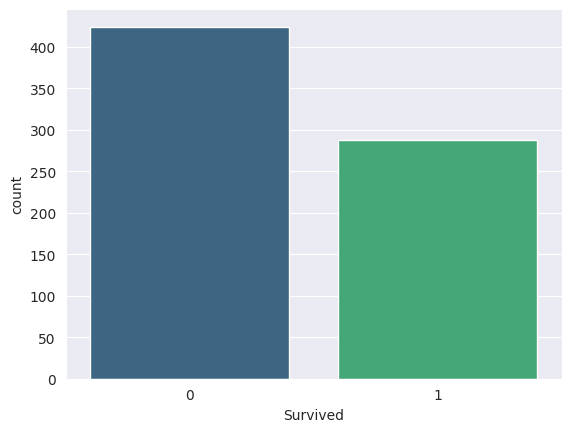

In [13]:
sns.set_style("darkgrid")
sns.countplot(x = "Survived", data = train, palette = "viridis")

In [14]:
train.Survived.value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

* Are there any factor(s) that affects the survival of a passenger?



* What's the effect of gender variable on survival?

<Axes: xlabel='Survived', ylabel='count'>

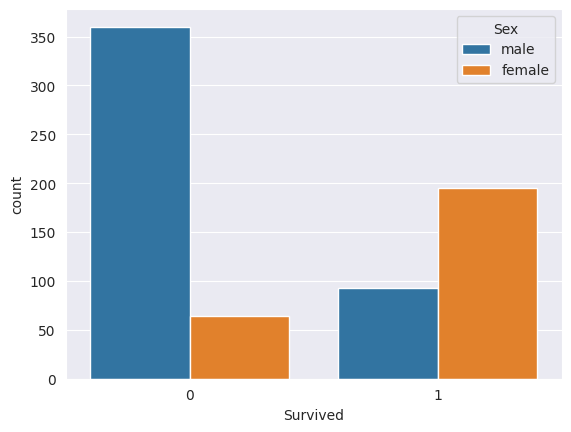

In [15]:
sns.set_style("darkgrid")
sns.countplot(x = "Survived", hue = "Sex", data = train)

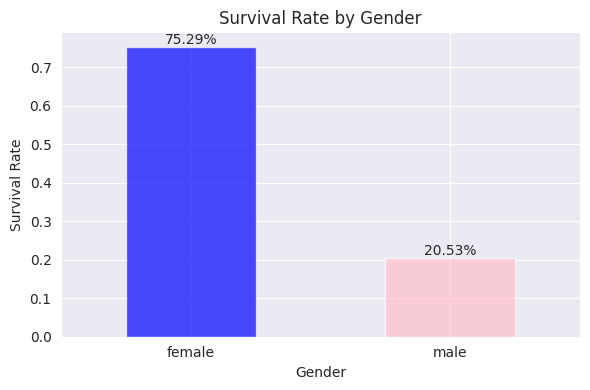

In [16]:
# Group the data by 'Sex' and calculate the survival rate
survival_by_sex = train.groupby('Sex')['Survived'].mean()

# Plot the survival rate by gender
plt.figure(figsize=(6, 4))
bars = survival_by_sex.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# Annotate the bars with survival percentage at the top
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height()*100:.2f}%", 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


Majority of people that died were men. This might mean that women were given priority to be saved.

<Axes: xlabel='Survived', ylabel='count'>

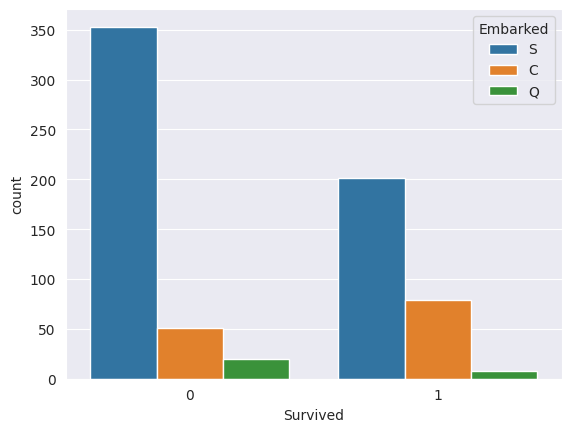

In [17]:
#Boarding ports
sns.set_style("darkgrid")
sns.countplot(x = "Survived", hue = "Embarked", data = train)

In [18]:
train.Embarked.value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

Most people that died boarded from Southampton, this may be because more passengers boarded from there.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

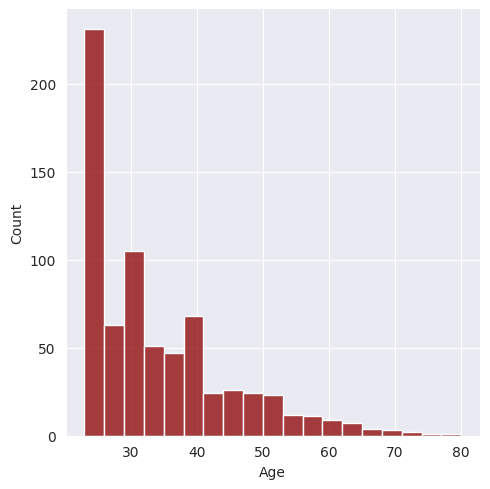

In [19]:
plt.figure(figsize = (10, 6))
sns.displot(train["Age"], color = "darkred")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

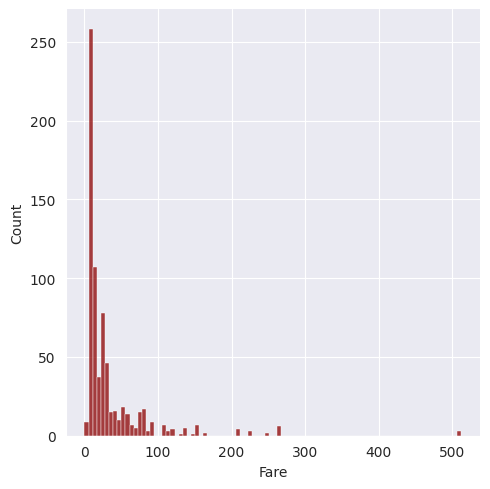

In [20]:
plt.figure(figsize = (10, 6))
sns.displot(train["Fare"], color = "darkred")

* Passenger tickets vary from 0 to 50 and there was a decrease after that.

* The data has a tail to the right.

* It is skewed to the left.

#### Correlation Between All the Variables.

In [21]:
train.Embarked.value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

In [22]:
new_train = train.copy()
new_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,23.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
new_train['Embarked'] = new_train['Embarked'].replace({'S':0,'C':1,'Q':2})
new_train['Sex'] = new_train['Sex'].replace({'male':0,'female':1})

/tmp/ipykernel_17/3780226896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_train['Embarked'] = new_train['Embarked'].replace({'S':0,'C':1,'Q':2})
/tmp/ipykernel_17/3780226896.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_train['Sex'] = new_train['Sex'].replace({'male':0,'female':1})


In [24]:
new_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,23.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [25]:
new_train.drop(["Name","Ticket"], axis = 1, inplace = True)

In [26]:
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,23.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [27]:
last_column = new_train.pop('Survived')
length = len(new_train.columns)
new_train.insert((length), 'Survived', last_column)

In [28]:
new_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,0,23.0,1,0,7.2500,0,0
1,2,1,1,38.0,1,0,71.2833,1,1
2,3,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,3,0,35.0,0,0,8.0500,0,0


<Axes: >

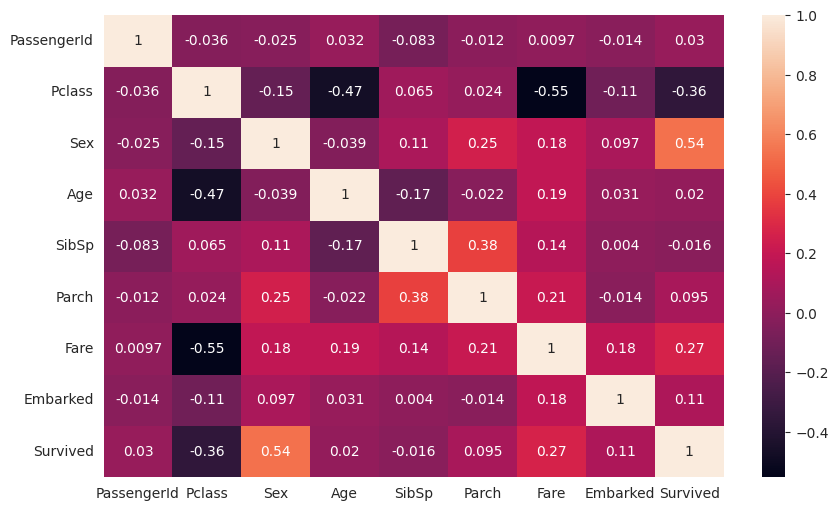

In [29]:

plt.figure(figsize = (10, 6))
sns.heatmap(new_train.corr(), annot = True)

In [30]:
new_train.drop(["PassengerId","Age","SibSp","Parch"], axis = 1, inplace = True)

In [31]:
new_train.head()

,Pclass,Sex,Fare,Embarked,Survived
0,3,0,7.2500,0,0
1,1,1,71.2833,1,1
2,3,1,7.9250,0,1
3,1,1,53.1000,0,1
4,3,0,8.0500,0,0


#### MODELLING  

#### 1. Logistic Regression Algorithm

In [32]:
from sklearn.model_selection import train_test_split

X = new_train.drop("Survived", axis = 1)
y = new_train["Survived"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [34]:
from sklearn.linear_model import LogisticRegression

#Training the model
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
#Predicting
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.7415730337078652


##### Classification report 

In [37]:
#Test the accuracy using Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        99
           1       0.74      0.65      0.69        79

    accuracy                           0.74       178
   macro avg       0.74      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178



In [39]:
#Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[81, 18],
       [28, 51]])

**Cross Validation.**

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score(lr_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7526143790849673


**Hyperparameter Optimization(with GridSearchCV)**

In [42]:
from sklearn.model_selection import GridSearchCV

lr_model_new = LogisticRegression()
lr_model_new

LogisticRegression()

In [43]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}



In [44]:
log_reg_grid = GridSearchCV(lr_model_new, param_grid = parameters)


In [45]:
log_reg_grid.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [46]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'liblinear'}


In [47]:
lr_model_new2 = LogisticRegression(penalty = "l2", solver = "newton-cg")
lr_model_new2

LogisticRegression(solver='newton-cg')

In [48]:
lr_model_new2.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [49]:
y_pred = lr_model_new2.predict(X_test)

print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.7415730337078652


#### 2. Decision Tree Algorithm

In [50]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 5)

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [51]:
y_pred = dec_tree.predict(X_test)

print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.7865168539325843


In [52]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.6908496732026144


#### 3. Support Vector Machine Algorithm.

In [53]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 5)

svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [54]:
y_pred = svc_model.predict(X_test)

print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.6404494382022472


In [55]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.6176470588235293


#### 4.  Random Forest Algorithm.

In [56]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 5)

random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [57]:
y_pred = random_forest.predict(X_test)

print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.7865168539325843


In [58]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.707843137254902
